**Load Data**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!cp "/content/drive/My Drive/29414_37484_bundle_archive.zip" "29414_37484_bundle_archive.zip"

In [4]:
!unzip input.zip

Archive:  input.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [5]:
import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/input/ptbdb_abnormal.csv
/content/input/ptbdb_normal.csv
/content/input/mitbih_train.csv
/content/input/mitbih_test.csv


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [7]:

train_df=pd.read_csv('/content/input/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/input/mitbih_test.csv',header=None)

**Balance of dataset**

In [8]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)



0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


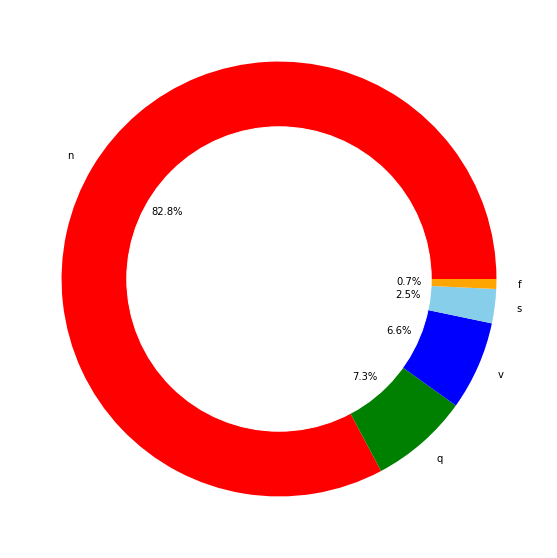

In [9]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

We can underligned a huge difference in the balanced of the classes. After some try i have decided to  choose the resample technique more than the class weights for the algorithms. 

In [10]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [11]:
equilibre=train_df[187].value_counts()
print(equilibre)


4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


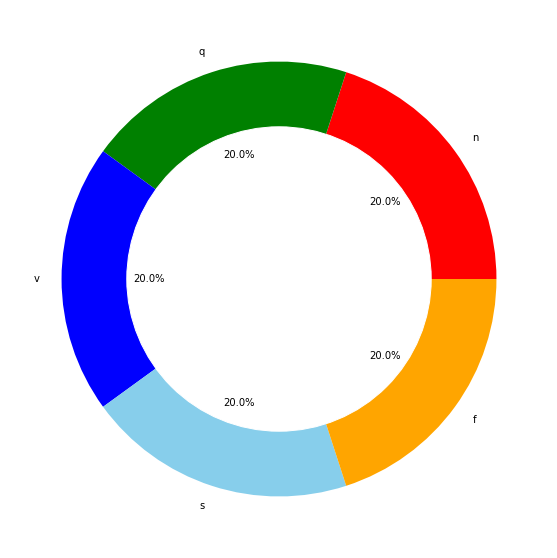

In [12]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Resample works perfectly we can go on. 

**Classes**

In this part i want to study the differente classes. 

In [13]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

I take one sample per class and i store it in a datafrmae in order to have an exmeple. 

In [14]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
25809,0.920561,0.817757,0.336449,0.112150,0.074766,0.079439,0.037383,0.046729,0.056075,0.051402,0.042056,0.046729,0.032710,0.042056,0.028037,0.032710,0.037383,0.056075,0.060748,0.051402,0.028037,0.032710,0.037383,0.051402,0.046729,0.056075,0.065421,0.079439,0.074766,0.112150,0.121495,0.154206,0.154206,0.135514,0.116822,0.112150,0.088785,0.079439,0.051402,0.037383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
74669,0.835897,0.892308,0.394872,0.107692,0.225641,0.302564,0.225641,0.323077,0.364103,0.292308,0.312821,0.379487,0.441026,0.461538,0.451282,0.466667,0.482051,0.497436,0.446154,0.466667,0.492308,0.492308,0.471795,0.502564,0.507692,0.497436,0.502564,0.569231,0.589744,0.584615,0.600000,0.630769,0.651282,0.676923,0.671795,0.666667,0.656410,0.641026,0.610256,0.584615,...,0.446154,0.420513,0.405128,0.430769,0.415385,0.374359,0.364103,0.415385,0.410256,0.364103,0.358974,0.379487,0.389744,0.369231,0.369231,0.415385,0.410256,0.4,0.4,0.410256,0.379487,0.4,0.394872,0.379487,0.379487,0.369231,0.364103,0.4,0.394872,0.358974,0.338462,0.353846,0.358974,0.364103,0.348718,0.333333,0.348718,0.333333,0.338462,1
79586,0.824597,0.864919,0.806452,0.741935,0.729839,0.723790,0.774194,0.699597,0.465726,0.221774,0.163306,0.131048,0.118952,0.088710,0.086694,0.070565,0.078629,0.048387,0.052419,0.028226,0.030242,0.020161,0.020161,0.000000,0.012097,0.010081,0.032258,0.032258,0.060484,0.086694,0.131048,0.157258,0.209677,0.223790,0.252016,0.245968,0.245968,0.233871,0.233871,0.211694,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
80928,0.425743,0.415842,0.210750,0.052334,0.000000,0.067893,0.110325,0.096181,0.096181,0.093352,0.089109,0.097595,0.097595,0.100424,0.103253,0.104668,0.121641,0.138614,0.151344,0.179632,0.199434,0.210750,0.243281,0.278642,0.316832,0.349364,0.364922,0.393211,0.415842,0.421499,0.422914,0.413013,0.403112,0.390382,0.360679,0.345120,0.332390,0.305516,0.294201,0.288543,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
82750,0.848797,0.487972,0.512028,0.501718,0.512028,0.494845,0.487972,0.405498,0.271478,0.082474,0.044674,0.099656,0.123711,0.120275,0.192440,0.185567,0.182131,0.175258,0.195876,0.206186,0.223368,0.199313,0.216495,0.206186,0.213058,0.202749,0.223368,0.213058,0.233677,0.233677,0.268041,0.268041,0.312715,0.333333,0.326460,0.323024,0.353952,0.347079,0.350515,0.347079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4


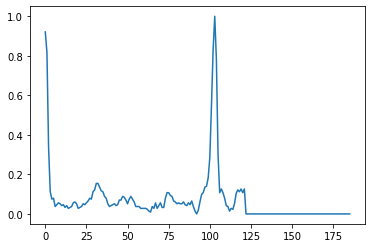

In [15]:
 plt.plot(c.iloc[0,:186])

Here is a normal beat. I don't have something particular to say on that class.  

In [16]:
def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


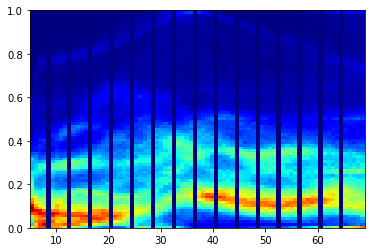

In [17]:
plot_hist(0,70,5)

Here is a representation for all the class. We take all the signal and map them. Like that we have an estimation what the signal can look like.

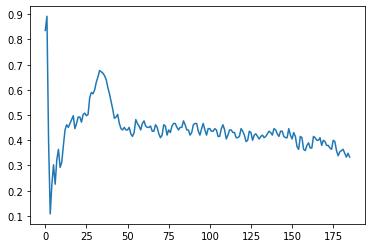

In [18]:
 plt.plot(c.iloc[1,:186])

900000
900000


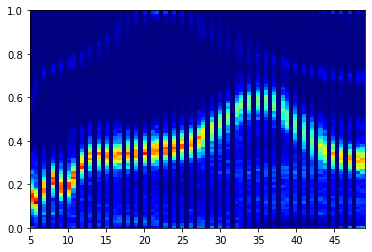

In [19]:
plot_hist(1,50,5)

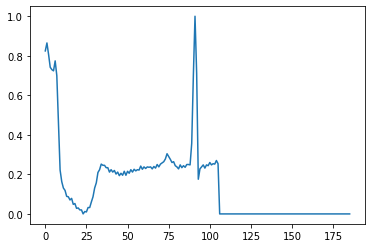

In [20]:
 plt.plot(c.iloc[2,:186])

600000
600000


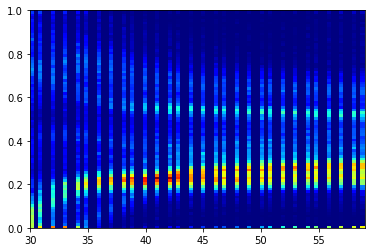

In [21]:
plot_hist(2,60,30)

Here is an exemple of the two classes :

![4-Figure2-1.png](attachment:4-Figure2-1.png)

in the second and third line you have the 2 et 3 class.

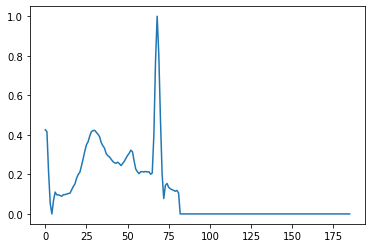

In [22]:
plt.plot(c.iloc[3,:186])

700000
700000


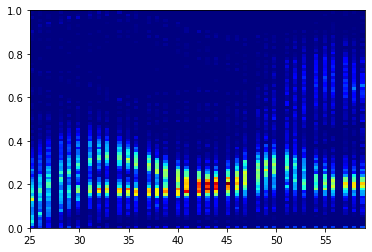

In [23]:
plot_hist(3,60,25)

Fusion beat :
![3-s2.0-B9780124159365000098-f09-10-9780124159365.jpg](attachment:3-s2.0-B9780124159365000098-f09-10-9780124159365.jpg)

Don't really see the difference with the previous one but i'm not an expert of ECG!

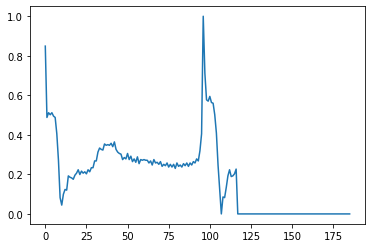

In [24]:
plt.plot(c.iloc[4,:186])

I will not comment a lot this one because it correspond to other class. 

640000
640000


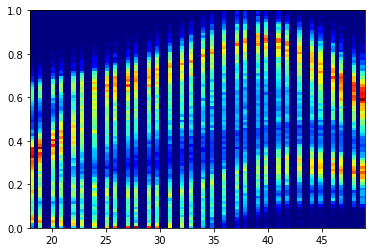

In [25]:
plot_hist(4,50,18)

**Pretreat**

In this part i will speak o n what i do to transform data. 

In [26]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)


I use a fonction ( will depend of the version) where i add a noise to the data to generilize my train.

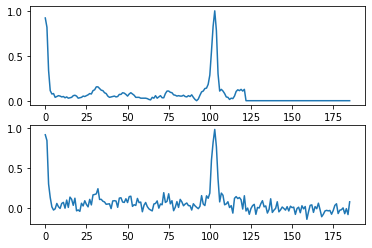

In [27]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()



In [28]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [29]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

**Network**

In [31]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    conv4_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool3)
    conv4_1=BatchNormalization()(conv4_1)
    pool4=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv4_1)
    conv5_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool4)
    conv5_1=BatchNormalization()(conv5_1)
    pool5=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv5_1)
    conv6_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool5)
    conv6_1=BatchNormalization()(conv6_1)
    pool6=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv6_1)
    flatten=Flatten()(pool6)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    dense_end3 = Dense(32, activation='relu')(dense_end2)
    dense_end4 = Dense(32, activation='relu')(dense_end3)
    dense_end5 = Dense(32, activation='relu')(dense_end4)
    dense_end6 = Dense(32, activation='relu')(dense_end5)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end5)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy',f1_m,precision_m, recall_m])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=120),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=120,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [33]:
def evaluate_model(history,X_test,y_test,model):
    import matplotlib.colors as mcolors
    plt.rcParams['axes.axisbelow'] = True
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    print("f1_m: %.2f%%" % (scores[2]*100))
    print("precision: %.2f%%" % (scores[3]*100))
    print("recall: %.2f%%" % (scores[4]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    ax_acc.set_facecolor("aliceblue")
    plt.plot(history.history['accuracy'],'r')
    plt.plot(history.history['val_accuracy'],'g')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    ax_loss.set_facecolor("aliceblue")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.show()
   
    
    fid3, ax_precision =plt.subplots()
    ax_precision.set_facecolor("aliceblue")
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Metrics vs epochs')
    
    plt.plot(history.history['precision_m'],'r')
    plt.plot(history.history['recall_m'],'g')
    plt.legend(['Recall', 'Precision'], loc='upper right')
    plt.show()
    
    fid4, ax_recall =plt.subplots()
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title('recall vs epochs')
    
    #plt.plot(history.history['precision_m'])
    plt.plot(history.history['recall_m'])
    #plt.legend(['Recall', 'Precision'], loc='upper right')
    plt.show()
    
    fid5, ax_metric =plt.subplots()
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.title('Precision vs epochs')
    
    plt.plot(history.history['precision_m'])
    #plt.plot(history.history['recall_m'])
    #plt.legend(['Recall', 'Precision'], loc='upper right')
    plt.show()
    y_true=[]
    target_names=['0','1','2','3','4']
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    model.summary()
    

In [34]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)



Train on 100000 samples, validate on 21892 samples
Epoch 1/120
100000/100000 [==============================] - 112s 1ms/step - loss: 0.2839 - accuracy: 0.8986 - f1_m: 0.8950 - precision_m: 0.9156 - recall_m: 0.8784 - val_loss: 0.5576 - val_accuracy: 0.8140 - val_f1_m: 0.8108 - val_precision_m: 0.8281 - val_recall_m: 0.7948
Epoch 2/120
100000/100000 [==============================] - 112s 1ms/step - loss: 0.1229 - accuracy: 0.9573 - f1_m: 0.9576 - precision_m: 0.9615 - recall_m: 0.9539 - val_loss: 0.2037 - val_accuracy: 0.9260 - val_f1_m: 0.9262 - val_precision_m: 0.9289 - val_recall_m: 0.9236
Epoch 3/120
100000/100000 [==============================] - 112s 1ms/step - loss: 0.0852 - accuracy: 0.9706 - f1_m: 0.9708 - precision_m: 0.9726 - recall_m: 0.9692 - val_loss: 0.1650 - val_accuracy: 0.9423 - val_f1_m: 0.9423 - val_precision_m: 0.9448 - val_recall_m: 0.9400
Epoch 4/120
100000/100000 [==============================] - 113s 1ms/step - loss: 0.0684 - accuracy: 0.9772 - f1_m: 0.9772 

In [ ]:
#adding test_check1
#adding test_check2
#adding test_check3
#adding test_check4
#adding test_check5

In [35]:
print(K.eval(model.optimizer.lr))
#adding test_check9

0.001


evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)



Accuracy: 97.65%
f1_m: 97.66%
precision: 97.70%
recall: 97.61%


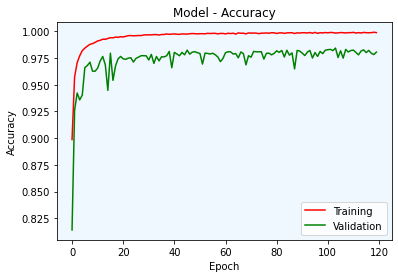

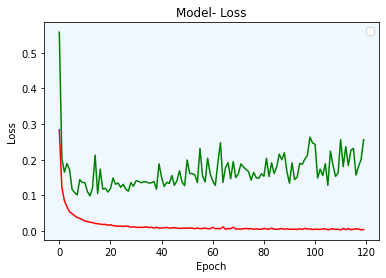

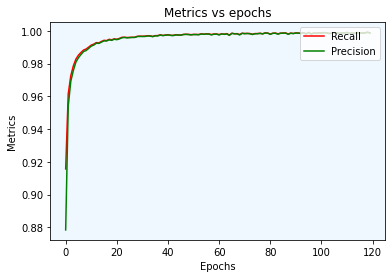

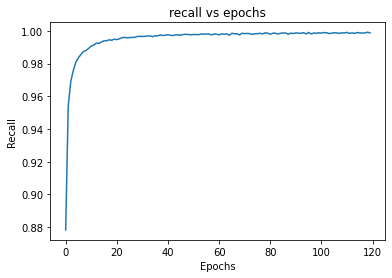

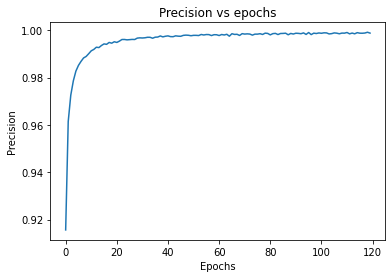

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 186, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 181, 64)           448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 181, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 91, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 89, 64)            12352     
_________________________________________________________________
batch_normalization_2 (Batch (None, 89, 64)            256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 45, 64)            0   

In [36]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

i take the next function from : https://www.kaggle.com/coni57/model-from-arxiv-1805-00794

Normalized confusion matrix


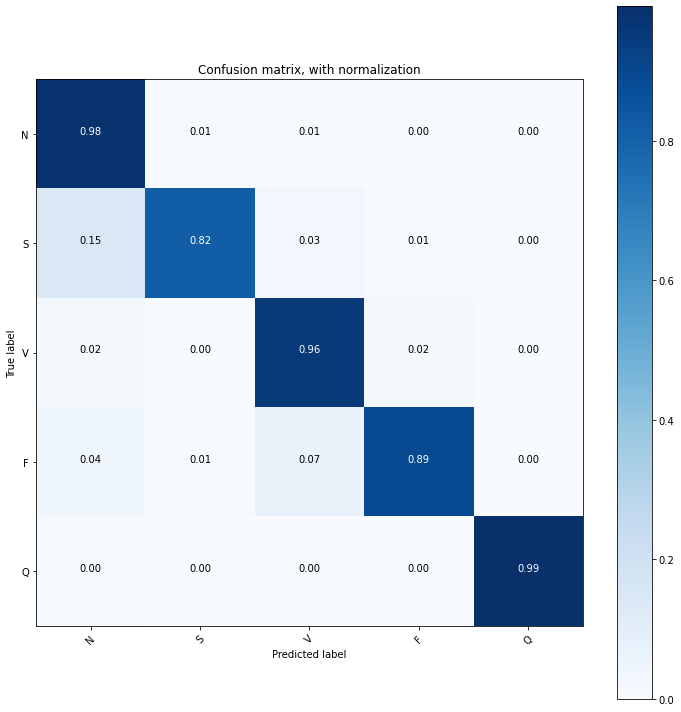

In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()



We underlign that two class(supraventricular and fusion) is weeker than the other. maybe due to less exemple in the starter dataset. I will try to improve in the next version.